# CNN Basics

## Objectives

- Describe the terms convolution, kernel/filter, pooling, and flattening
- Explain how convolutional neural networks (CNNs) work
- Calculate the number of parameters in a given CNN architecture
- Create a CNN in `PyTorch`
- Discuss the key differences between CNNs and fully connected NNs

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

## Convolutions and Filters

Convolution really just means "to pass over the data". What are we "passing"? Our filters - which are also called **kernels**. Here's another gif like the one we saw earlier:

![](https://www.tomasbeuzen.com/deep-learning-with-pytorch/_images/conv-1.gif)

## `nn.Conv2d`

We can easily create a filter/convolution in `PyTorch`:

In [36]:
conv = nn.Conv2d(in_channels=1,
                 out_channels=1,
                 kernel_size=2)

In [29]:
conv.weight

Parameter containing:
tensor([[[[ 0.3451,  0.0424],
          [ 0.0066, -0.1201]]]], requires_grad=True)

In [30]:
conv.bias

Parameter containing:
tensor([-0.3871], requires_grad=True)

However, there are some hard requirement for the tensor if you attempt to apply the conv2d into it.
The tensor must be 4-dim, in the format of **[number of sample, channel, hight, width]**.

In [31]:
x = torch.tensor(
    [[[
        [1, 4, -1, 0],
        [2, 5, 4, 1],
        [4, 1, 2, -5],
        [-2, 1, 2, 1],
    ]]],
    dtype=torch.float,
)

In [32]:
x.shape

torch.Size([1, 1, 4, 4])

Then, we can apply the conv2d to this tensor.

In [37]:
x_f = conv(x)
x_f

tensor([[[[-0.3125,  0.6947, -0.1986],
          [ 2.0626,  2.5073,  4.3312],
          [ 1.6162,  0.3879, -0.0387]]]], grad_fn=<ConvolutionBackward0>)

The resultant tensor is also 4-dim:

In [38]:
x_f.shape

torch.Size([1, 1, 3, 3])

## Conv2d and Images

We can apply `conv2d` to images.

### Load images

In [7]:
!wget -O lenna.png 'https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png' 

--2023-03-05 19:44:56--  https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 2620:0:860:ed1a::2:b, 208.80.153.240
Connecting to upload.wikimedia.org (upload.wikimedia.org)|2620:0:860:ed1a::2:b|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘lenna.png’

lenna.png           100%[===================>] 462.73K  2.54MB/s    in 0.2s    

2023-03-05 19:44:56 (2.54 MB/s) - ‘lenna.png’ saved [473831/473831]



torch.Size([512, 512, 3])

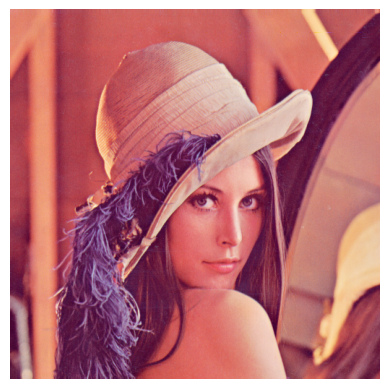

In [8]:
image = torch.from_numpy(plt.imread("lenna.png"))
plt.imshow(image, cmap='gray')
plt.axis('off')
image.shape

### View the image in three channels

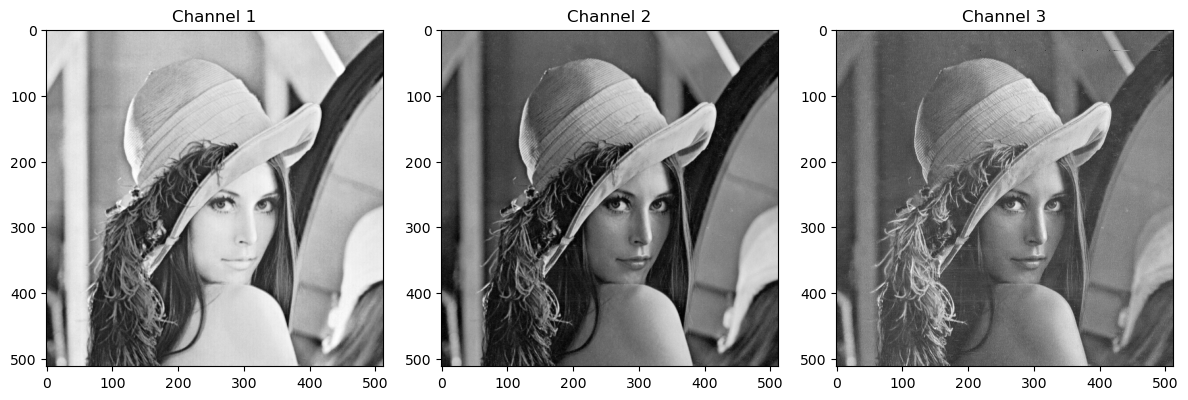

In [9]:
fig, axs = plt.subplots(figsize=(12, 4), ncols=3)
for i, ax in enumerate(axs.ravel()):
    ax.imshow(image[:, :, i], cmap='gray')
    ax.set_title(f"Channel {i+1}")
    ax.grid(False)
plt.tight_layout()

## Conv2d in images

### Single input

We take the red channel only.

In [10]:
image = torch.from_numpy(plt.imread("lenna.png"))
image_r = image[:, :, 0]
image_r.shape

torch.Size([512, 512])

We reshape the tensor to make it as [number, channel, height, width]

In [11]:
image_tensor = image_r[None, None, :]
image_tensor.shape

torch.Size([1, 1, 512, 512])

In [12]:
conv = nn.Conv2d(1, 1, kernel_size=(3, 3), padding=1)
image_f = conv(image_tensor)
image_f.shape

torch.Size([1, 1, 512, 512])

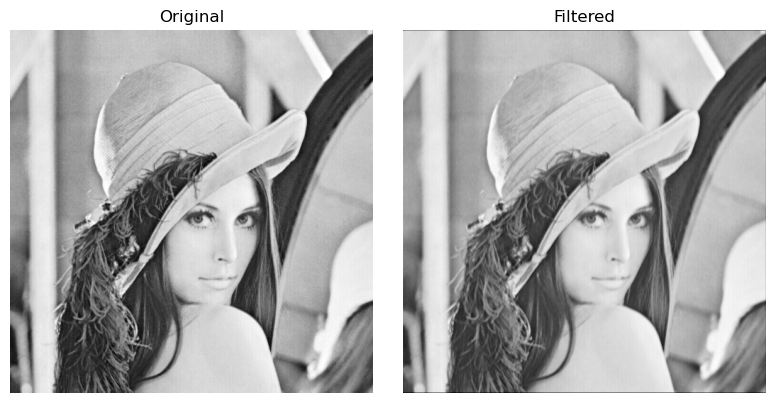

In [13]:
fig, (ax1, ax2) = plt.subplots(figsize=(8, 4), ncols=2)
ax1.imshow(image_r, cmap='gray')
ax1.axis('off')
ax1.set_title("Original")
ax2.imshow(image_f[:, 0, :, :].detach().squeeze(), cmap='gray')
ax2.set_title("Filtered")
ax2.axis('off')
plt.tight_layout()

### Single input channel, multiple out channels

In [14]:
image = torch.from_numpy(plt.imread("lenna.png"))
image_r = image[:, :, 0]
image_tensor = image_r[None, None, :]

In [15]:
conv = nn.Conv2d(1, 3, kernel_size=(3, 3), padding=1)
image_f = conv(image_tensor)
image_f.shape

torch.Size([1, 3, 512, 512])

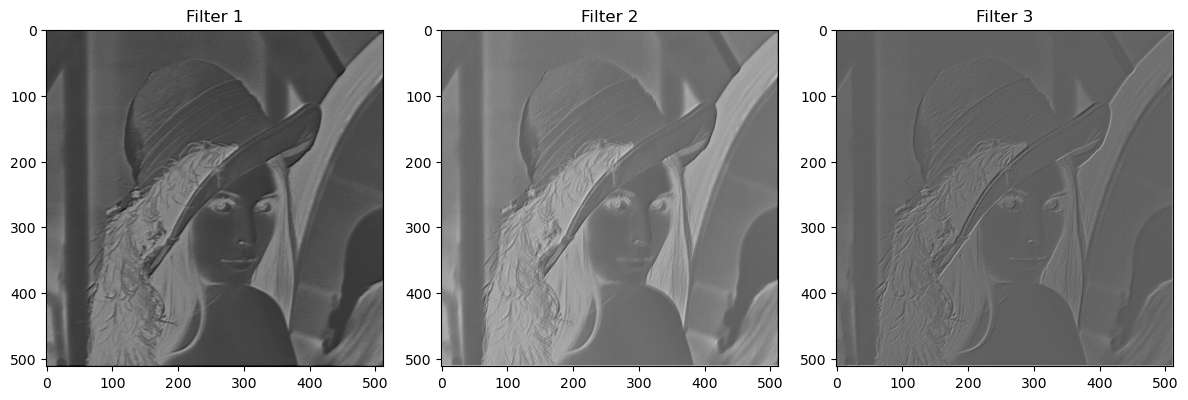

In [16]:
fig, axs = plt.subplots(figsize=(12, 4), ncols=3)
for i, ax in enumerate(axs.ravel()):
    ax.imshow(image_f[:, i, :, :].detach().squeeze(), cmap='gray')
    ax.set_title(f"Filter {i+1}")
    ax.grid(False)
plt.tight_layout()

### Multiple input channels and multiple output channels

In [17]:
image = torch.from_numpy(plt.imread("lenna.png"))
image_tensor = image[None, :, :].permute(0, 3, 1, 2)
image_tensor.shape

torch.Size([1, 3, 512, 512])

In [18]:
conv = nn.Conv2d(3, 5, kernel_size=(3, 3), padding=1)
image_f = conv(image_tensor)

image_f.shape

torch.Size([1, 5, 512, 512])

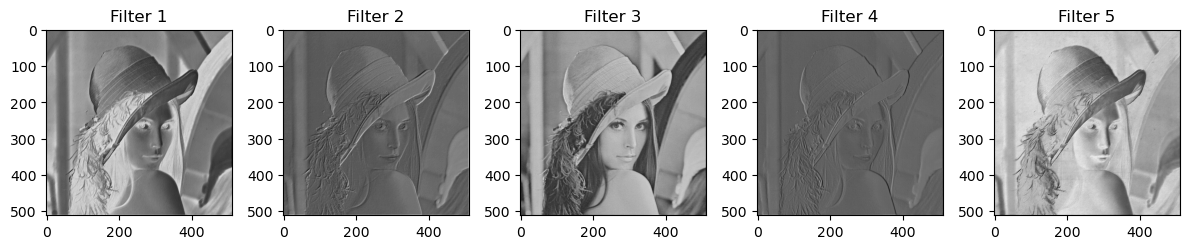

In [19]:
fig, axs = plt.subplots(figsize=(12, 4), ncols=5)
for i, ax in enumerate(axs.ravel()):
    ax.imshow(image_f[:, i, :, :].detach().squeeze(), cmap='gray')
    ax.set_title(f"Filter {i+1}")
    ax.grid(False)
plt.tight_layout()

## `nn.MaxPool2d`

In [24]:
maxpool = nn.MaxPool2d(kernel_size=2, stride=2)

In [25]:
x = torch.tensor(
    [[[
        [1, 4, -1, 0, 2, -2],
        [2, 5, 4, 1, 3, -4],
        [4, 1, 2, -5, 4, 1],
        [-2, 1, 2, 1, 3, 4],
    ]]],
    dtype=torch.float,
)
x.shape

torch.Size([1, 1, 4, 6])

In [26]:
maxpool(x)

tensor([[[[5., 4., 3.],
          [4., 2., 4.]]]])